In [1]:
from __future__ import print_function

plot_to_pdf = True

if plot_to_pdf:
    import matplotlib as mpl
    mpl.use('pdf')
    
    import matplotlib.pyplot as plt
    
    plt.rc('font', family='serif', serif='Times')
    plt.rc('text', usetex=True)
    plt.rc('xtick', labelsize=10)
    plt.rc('ytick', labelsize=10)
    plt.rc('axes', labelsize=10)
    plt.rc('legend', fontsize=10)
    title_font_size = 12
    data_font_size = 8
else:
    import matplotlib.pyplot as plt

import pyexotica as exo
import numpy as np
from time import time

from tqdm import *

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter, MultipleLocator
%matplotlib inline

from topological_memory_clustering.homology import *

In [2]:
data = np.load('cartpole_policies_analytic_from_random_50.npz')
data.keys()
solutions = data['state_trajectories'].swapaxes(1,2)
print(solutions.shape)

(366, 50, 4)


In [3]:
from scipy import signal
from scipy import interpolate
from tqdm import tqdm
from matplotlib import colors

In [4]:
debug_plot_scalability = False

print(solutions.shape)
scalability = np.nan * np.ones((solutions.shape[0]+1, solutions.shape[1]+1))

T_old = solutions.shape[1]
D = solutions.shape[2] # Dimension of state space
N_lower = 2
T_lower = 5

N_max = 50 # solutions.shape[0]
T_max = 50 # solutions.shape[1]

for N in tqdm(range(N_lower, N_max, 2)):
    s = time()
    for T_new in range(T_lower, T_max, 2):        
        debug_plot_scalability and plt.figure()
        debug_plot_scalability and plt.plot(demos_tmp[0,:,0], demos_tmp[0,:,1], '-.', label='Original')
        
        demos_tmp = np.zeros((N, T_new, D))
        for n in range(N):
            for d in range(D):
                range_old = np.linspace(0, 1, T_old)
                range_new = np.linspace(0, 1, T_new)
                my_interp = interpolate.interp1d(range_old, solutions[n,:,d], kind='cubic')
                demos_tmp[n,:,d] = my_interp(range_new)
                
        debug_plot_scalability and plt.plot(demos_tmp[0,:,0], demos_tmp[0,:,1], '--x', label='Resampled')
        debug_plot_scalability and plt.legend()
        debug_plot_scalability and plt.show()
        
        #print(N, time_subsampling, demos_tmp.shape)
        result_tmp, D_tmp = compute_homology_filtration(demos_tmp, debug=False)
        scalability[N,T_new] = result_tmp['time_dense']
        
        #print("N={0}\t T={1}\t time={2:.3f}".format(N, T_new, result_tmp['time_dense']))
        del result_tmp, D_tmp
    e = time()
    print(N, "took", e-s)

  0%|          | 0/24 [00:00<?, ?it/s]

(366, 50, 4)
2 took 0.09607648849487305


  8%|▊         | 2/24 [00:00<00:05,  3.99it/s]

4 took 0.4054141044616699


 12%|█▎        | 3/24 [00:01<00:12,  1.66it/s]

6 took 1.0954279899597168


 17%|█▋        | 4/24 [00:07<00:54,  2.74s/it]

8 took 6.328124046325684


 21%|██        | 5/24 [00:14<01:17,  4.09s/it]

10 took 6.615762710571289


 25%|██▌       | 6/24 [01:02<05:34, 18.60s/it]

12 took 47.82379102706909


 29%|██▉       | 7/24 [02:19<10:37, 37.49s/it]

14 took 77.32179021835327


 33%|███▎      | 8/24 [04:13<16:25, 61.61s/it]

16 took 114.10852599143982


 38%|███▊      | 9/24 [06:02<19:01, 76.13s/it]

18 took 108.4223198890686


 42%|████▏     | 10/24 [09:04<25:20, 108.59s/it]

20 took 181.8377718925476


 46%|████▌     | 11/24 [13:20<33:16, 153.58s/it]

22 took 256.1241545677185


 50%|█████     | 12/24 [18:51<41:31, 207.64s/it]

24 took 331.75883436203003


 54%|█████▍    | 13/24 [25:55<50:03, 273.07s/it]

26 took 424.00057315826416


 58%|█████▊    | 14/24 [34:36<57:58, 347.83s/it]

28 took 520.8801038265228


 62%|██████▎   | 15/24 [50:28<1:19:26, 529.61s/it]

30 took 951.4278457164764


 67%|██████▋   | 16/24 [1:08:08<1:31:53, 689.22s/it]

32 took 1060.1820802688599


 71%|███████   | 17/24 [1:28:40<1:39:26, 852.32s/it]

34 took 1231.8649756908417


 75%|███████▌  | 18/24 [1:50:59<1:39:51, 998.55s/it]

36 took 1339.095703125


 79%|███████▉  | 19/24 [2:16:02<1:35:49, 1149.99s/it]

38 took 1502.897134065628


 83%|████████▎ | 20/24 [2:42:02<1:24:52, 1273.06s/it]

40 took 1559.9502868652344


 88%|████████▊ | 21/24 [3:16:02<1:15:09, 1503.22s/it]

42 took 2039.896108865738


 92%|█████████▏| 22/24 [3:56:47<59:31, 1785.80s/it]  

44 took 2444.8745341300964


 96%|█████████▌| 23/24 [4:48:08<36:14, 2174.53s/it]

46 took 3081.2509953975677


100%|██████████| 24/24 [5:49:05<00:00, 872.73s/it] 

48 took 3657.3510966300964


In [5]:
scalability_expected = np.nan * np.ones((solutions.shape[0]+1, solutions.shape[1]+1))
for N in range(2, solutions.shape[0]):
    for T_new in range(5, solutions.shape[1]):
        scalability_expected[N,T_new] = (N*(T_new-1))**2

In [6]:
array = scalability.copy()

x = np.arange(0, array.shape[1])
y = np.arange(0, array.shape[0])
#mask invalid values
array = np.ma.masked_invalid(array)
xx, yy = np.meshgrid(x, y)
#get only the valid values
x1 = xx[~array.mask]
y1 = yy[~array.mask]
newarr = array[~array.mask]

GD1 = interpolate.griddata((x1, y1), newarr.ravel(),
                          (xx, yy),
                           method='cubic')
GD1[-3,:]= GD1[-4,:]
GD1[-2,:]= GD1[-3,:]

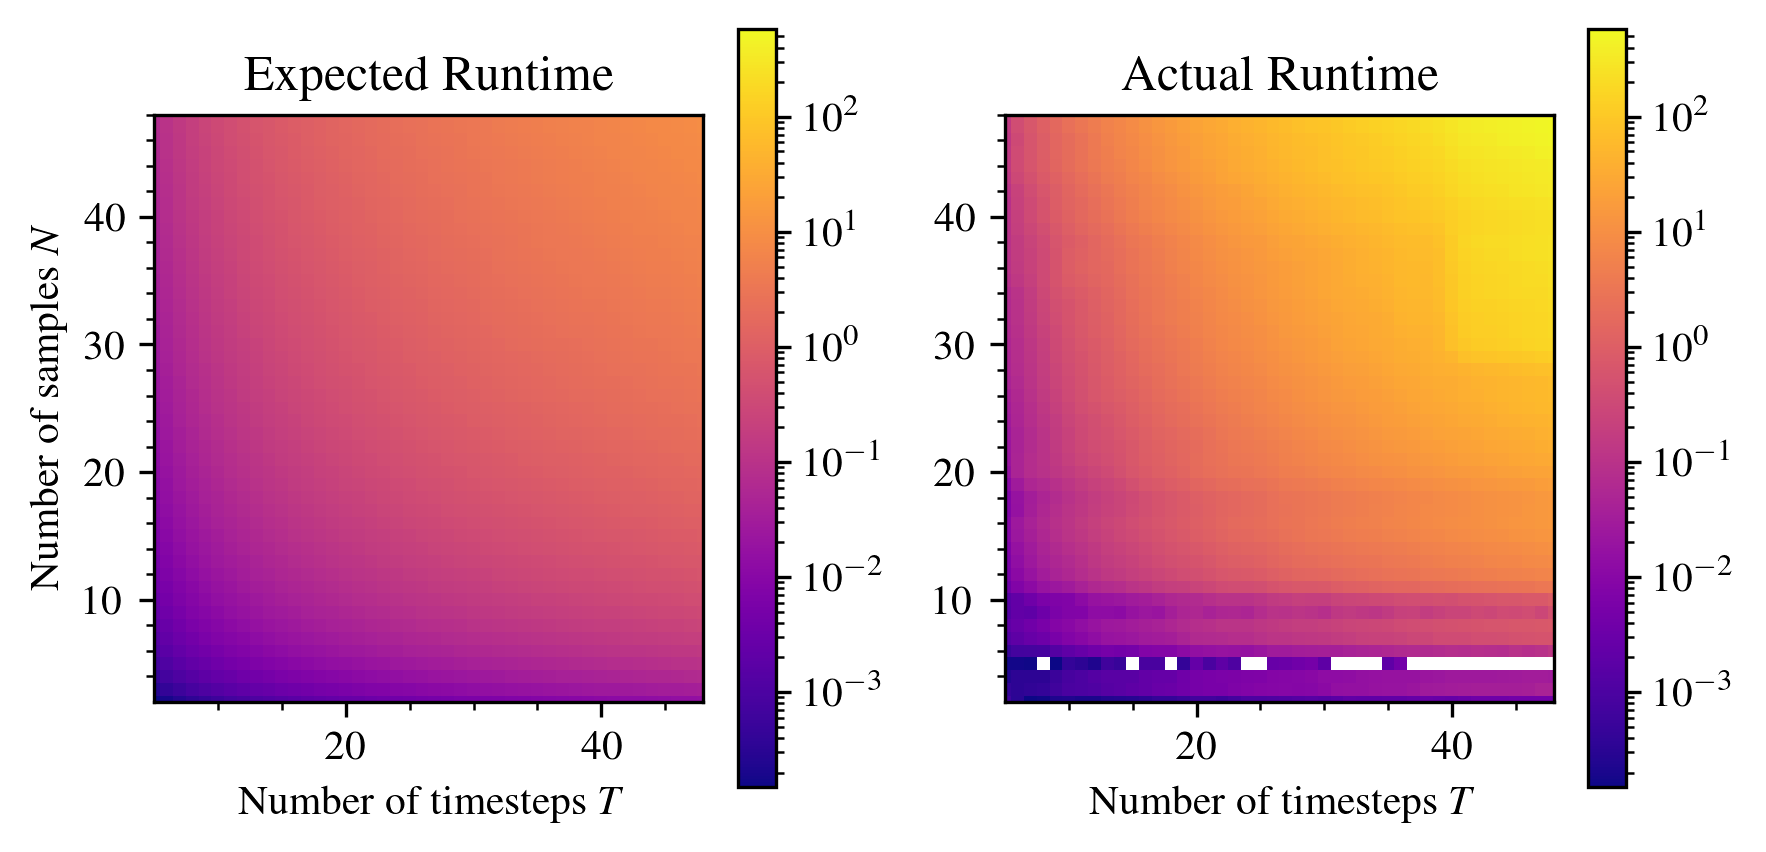

In [7]:
fig, ax = plt.subplots(1, 2, sharey=True)
fig.set_dpi(300)
fig.set_size_inches(6,3)

plt.subplot(121)
plt.title('Expected Runtime')
plt.imshow(scalability_expected * (np.nanmax(scalability) / np.nanmax(scalability_expected)), cmap='plasma', origin='lower', norm=colors.LogNorm(vmin=np.nanmin(scalability), vmax=np.nanmax(scalability)))
plt.ylabel(r'Number of samples $N$')
plt.xlabel(r'Number of timesteps $T$')
plt.ylim(N_lower, 50-2) #solutions.shape[0]-1)
plt.xlim(T_lower, 50-2) #solutions.shape[1]-1)
plt.minorticks_on()
plt.colorbar()

plt.subplot(122)
plt.title('Actual Runtime')
plt.imshow(GD1, cmap='plasma', origin='lower', norm=colors.LogNorm(vmin=np.nanmin(scalability), vmax=np.nanmax(scalability))) #, interpolation='kaiser')
#plt.ylabel(r'Number of samples $N$')
plt.xlabel(r'Number of timesteps $T$')
plt.ylim(N_lower, 50-2) #solutions.shape[0]-1)
plt.xlim(T_lower, 50-2) #solutions.shape[1]-1)
plt.minorticks_on()
plt.colorbar()

plt.tight_layout()
plt.show()

# fig.savefig('plot/cartpole_scalability_runtime2.pdf')

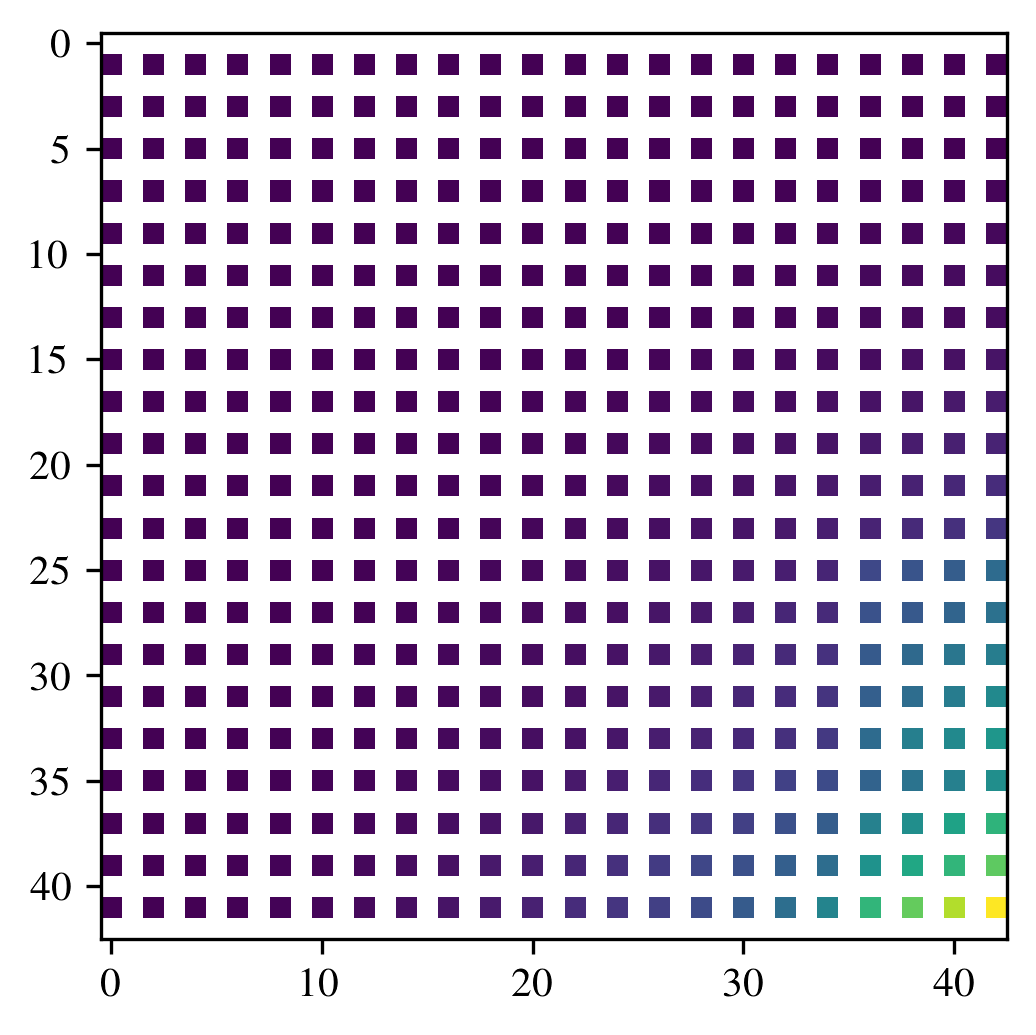

In [8]:
fig = plt.figure()
fig.set_dpi(300)
plt.imshow(scalability[5:48,5:48])